In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

In [2]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")
valid = pd.read_csv("../data/valid.csv")
X_train, y_train = train.drop(["Chronic Medical Conditions", "Income"], axis=1), train["Chronic Medical Conditions"]
X_valid, y_valid = valid.drop(["Chronic Medical Conditions", "Income"], axis=1), valid["Chronic Medical Conditions"]
X_test, y_test = train.drop(["Chronic Medical Conditions", "Income"], axis=1), test["Chronic Medical Conditions"]

In [3]:
gs = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid={
        "n_neighbors" : list(range(1, 10, 1)),
        "weights" : ["uniform", "distance"],
        "metric" : ["cosine", "euclidean", "l1"]
    },
    cv=3,
    n_jobs=-1
)

In [4]:
X_train.shape

(248260, 11)

In [5]:
gs.fit(X_train[:30_000], y_train[:30_000])

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.92586667 0.92586667 0.91586667 0.92586667 0.937      0.93576667
 0.93713333 0.93793333 0.94336667 0.94086667 0.94553333 0.9424
 0.9447     0.9431     0.94833333 0.9441     0.9458            nan
 0.9179     0.9179     0.90813333 0.9179     0.92973333 0.93133333
 0.93376667 0.93386667 0.93643333 0.93723333 0.94093333 0.93873333
 0.93836667 0.9401     0.94256667 0.9398     0.93876667 0.9403
 0.91363333 0.91363333 0.90816667 0.91363333 0.92546667 0.927
 0.93353333 0.92946667 0.9337     0.93393333 0.94       0.93563333
 0.93456667 0.93616667 0.94133333 0.93673333 0.93576667 0.93796667]
  warnings.warn(


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['cosine', 'euclidean', 'l1'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']})

In [10]:
best_model = gs.best_estimator_

In [11]:
best_model

KNeighborsClassifier(metric='cosine', n_neighbors=8)

In [12]:
best_model.weights

'uniform'

In [13]:
gs = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid={
        "n_neighbors" : list(range(1, 10, 1)),
        "weights" : ["uniform", "distance"]
    },
    cv=3,
    n_jobs=-1
)

In [14]:
gs.fit(X_train[:30_000], y_train[:30_000])

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']})

In [15]:
model = gs.best_estimator_

In [16]:
model

KNeighborsClassifier(n_neighbors=8)

In [17]:
model.weights

'uniform'

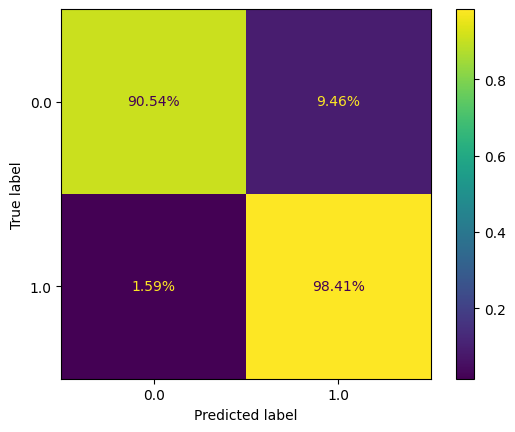

In [18]:
model = KNeighborsClassifier(n_neighbors=8, weights="uniform", n_jobs=-1)
model.fit(X_train, y_train)
y_pred_valid = model.predict(X_valid)
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")

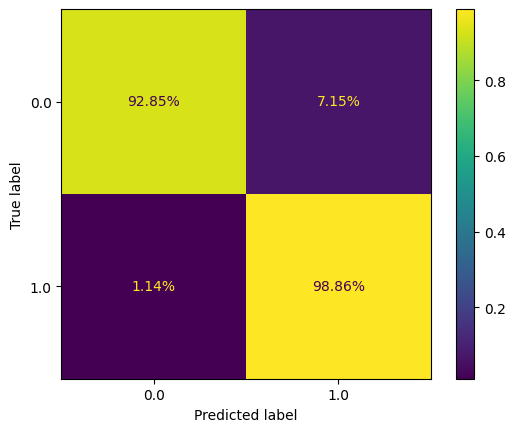

In [19]:
model = KNeighborsClassifier(n_neighbors=8, weights="uniform", n_jobs=-1)
model.fit(X_train, y_train)
y_pred_valid = model.predict(X_train)
ConfusionMatrixDisplay.from_predictions(y_true=y_train, y_pred=y_pred_valid, normalize="true", values_format=".2%")

In [22]:
for n in range(1, 10):
    model = KNeighborsClassifier(n_neighbors=n, weights="uniform")
    model.fit(X_train, y_train)
    y_pred_valid = model.predict(X_valid)
    print(f"accuracy {n} neighbours -> {np.mean(y_valid==y_pred_valid)}")

accuracy 1 neighbours -> 0.9553133383280566
accuracy 2 neighbours -> 0.946673272591053
accuracy 3 neighbours -> 0.9563767310341494
accuracy 4 neighbours -> 0.9560867148415787
accuracy 5 neighbours -> 0.9550354061435097
accuracy 6 neighbours -> 0.9563888150421732
accuracy 7 neighbours -> 0.9542016095898688
accuracy 8 neighbours -> 0.9559175387292457
accuracy 9 neighbours -> 0.9526186045387535


In [23]:
for n in range(1, 10):
    model = KNeighborsClassifier(n_neighbors=n, weights="distance")
    model.fit(X_train, y_train)
    y_pred_valid = model.predict(X_valid)
    print(f"accuracy {n} neighbours -> {np.mean(y_valid==y_pred_valid)}")

accuracy 1 neighbours -> 0.9553133383280566
accuracy 2 neighbours -> 0.9553133383280566
accuracy 3 neighbours -> 0.9575005437803611
accuracy 4 neighbours -> 0.9586606085506441
accuracy 5 neighbours -> 0.9582135002537642
accuracy 6 neighbours -> 0.9588418686710009
accuracy 7 neighbours -> 0.9585156004543587
accuracy 8 neighbours -> 0.9584068443821446
accuracy 9 neighbours -> 0.9584068443821446
